# Geographical Visualization

# Contents
- import data and libraries
- data wrangling
- data cleaning
- plotting a cloropleth

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import datetime as dt
import folium
import json
import matplotlib.pyplot as plt

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
# Import ".json" file for countries
geo=r'C:Users\TEDWI\OneDrive\Project 6\countries.geojson'

In [4]:
# looking at JSON file contents:

f = open(r'C:countries.geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'ADMIN': 'Aruba', 'ISO_A3': 'ABW'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-69.99693762899992, 12.577582098000036], [-69.93639075399994, 12.53172435100005], [-69.92467200399994, 12.519232489000046], [-69.91576087099992, 12.497015692000076], [-69.88019771999984, 12.453558661000045], [-69.87682044199994, 12.427394924000097], [-69.88809160099993, 12.417669989000046], [-69.90880286399994, 12.417792059000107], [-69.93053137899989, 12.425970770000035], [-69.94513912699992, 12.44037506700009], [-69.92467200399994, 12.44037506700009], [-69.92467200399994, 12.447211005000014], [-69.95856686099992, 12.463202216000099], [-70.02765865799992, 12.522935289000088], [-70.04808508999989, 12.53115469000008], [-70.05809485599988, 12.537176825000088], [-70.06240800699987, 12.546820380000057], [-70.06037350199995, 12.556952216000113], [-70.0510961579999, 12.574042059000064], [-70.04873613199993, 12.583726304000024], [-70.05264238199993, 12.600002346000053], [-7

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'type': 'Feature', 'properties': {'ADMIN': 'Vietnam', 'ISO_A3': 'VNM'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[106.66871178500006, 8.753485419000171], [106.6658634770001, 8.752875067000119], [106.65577233200005, 8.753485419000171], [106.66081790500007, 8.747381903000175], [106.66179446700002, 8.744452216000155], [106.66260826900006, 8.739813544000143], [106.63917076900006, 8.737453518000095], [106.6394962900001, 8.726467190000122], [106.64966881600006, 8.711859442000105], [106.65577233200005, 8.698879299000112], [106.64307701900006, 8.703802802000084], [106.63257897200018, 8.7032738300001], [106.62256920700011, 8.700506903000132], [106.61109459700018, 8.698879299000112], [106.602305535, 8.694728908000073], [106.60043379000015, 8.68496328300013], [106.60108483200011, 8.67365143400015], [106.60043379000015, 8.664740302000112], [106.60132897200006, 8.660142320000176], [106.60303795700005, 8.655707098000107], [106.59929446700019, 8.65241120000016], [106.5833439460001, 8.6

In [5]:

# Creating a path for the dataset
path = r'C:\Users\TEDWI\OneDrive\Project 6'

In [6]:
# Import the store data
df_store = pd.read_pickle(os.path.join(path, 'df_store_new.pkl'))

In [7]:
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
df_store.shape

(9789, 17)

In [9]:
df_store['Order Date'] =  pd.to_datetime(df_store['Order Date'])
df_store['Ship Date'] =  pd.to_datetime(df_store['Ship Date'])

C:\Users\TEDWI\AppData\Local\Temp\ipykernel_11260\2201790845.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_store['Order Date'] =  pd.to_datetime(df_store['Order Date'])
C:\Users\TEDWI\AppData\Local\Temp\ipykernel_11260\2201790845.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_store['Ship Date'] =  pd.to_datetime(df_store['Ship Date'])


In [10]:
df_store['Treatment time'] = df_store['Ship Date']- df_store['Order Date']

df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Treatment time
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,92 days
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,92 days
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,-173 days
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-23 days
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,-23 days


In [11]:
sorted(df_store['Postal Code'].unique())

[1040.0,
 1453.0,
 1752.0,
 1810.0,
 1841.0,
 1852.0,
 1915.0,
 2038.0,
 2138.0,
 2148.0,
 2149.0,
 2151.0,
 2169.0,
 2740.0,
 2886.0,
 2895.0,
 2908.0,
 2920.0,
 3060.0,
 3301.0,
 3820.0,
 4240.0,
 4401.0,
 6010.0,
 6040.0,
 6360.0,
 6450.0,
 6457.0,
 6460.0,
 6484.0,
 6708.0,
 6810.0,
 6824.0,
 7002.0,
 7011.0,
 7017.0,
 7036.0,
 7050.0,
 7055.0,
 7060.0,
 7090.0,
 7109.0,
 7501.0,
 7601.0,
 7960.0,
 8302.0,
 8360.0,
 8401.0,
 8701.0,
 8861.0,
 8901.0,
 10009.0,
 10011.0,
 10024.0,
 10035.0,
 10550.0,
 10701.0,
 10801.0,
 11520.0,
 11550.0,
 11561.0,
 11572.0,
 11757.0,
 12180.0,
 13021.0,
 13440.0,
 13501.0,
 13601.0,
 14215.0,
 14304.0,
 14609.0,
 14701.0,
 16602.0,
 17403.0,
 17602.0,
 18018.0,
 18103.0,
 19013.0,
 19120.0,
 19134.0,
 19140.0,
 19143.0,
 19601.0,
 19711.0,
 19805.0,
 19901.0,
 20016.0,
 20707.0,
 20735.0,
 20852.0,
 20877.0,
 21044.0,
 21215.0,
 21740.0,
 22153.0,
 22204.0,
 22304.0,
 22801.0,
 22901.0,
 22980.0,
 23223.0,
 23320.0,
 23434.0,
 23464.0,
 23602.0,
 

In [12]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Row ID          9789 non-null   int64          
 1   Order ID        9789 non-null   object         
 2   Order Date      9789 non-null   datetime64[ns] 
 3   Ship Date       9789 non-null   datetime64[ns] 
 4   Ship Mode       9789 non-null   object         
 5   Customer ID     9789 non-null   object         
 6   Customer Name   9789 non-null   object         
 7   Segment         9789 non-null   object         
 8   Country         9789 non-null   object         
 9   City            9789 non-null   object         
 10  State           9789 non-null   object         
 11  Postal Code     9789 non-null   float64        
 12  Product ID      9789 non-null   object         
 13  Category        9789 non-null   object         
 14  Sub-Category    9789 non-null   object  

# Data Wrangling

In [13]:
# Select only the necessary columns and put them in a list called columns
columns = ["Country",
           "State",
           "Postal Code",
           "Category",
          "Sub-Category",
          "Sales"]

In [14]:
# Create a subset
country_geo = df_store[columns]

In [15]:
country_geo.head()

,Country,State,Postal Code,Category,Sub-Category,Sales
0,United States,Kentucky,42420.0,Furniture,Bookcases,261.9600
1,United States,Kentucky,42420.0,Furniture,Chairs,731.9400
2,United States,California,90036.0,Office Supplies,Labels,14.6200
3,United States,Florida,33311.0,Furniture,Tables,957.5775
4,United States,Florida,33311.0,Office Supplies,Storage,22.3680


In [16]:
sorted(df_store['Postal Code'].unique())

[1040.0,
 1453.0,
 1752.0,
 1810.0,
 1841.0,
 1852.0,
 1915.0,
 2038.0,
 2138.0,
 2148.0,
 2149.0,
 2151.0,
 2169.0,
 2740.0,
 2886.0,
 2895.0,
 2908.0,
 2920.0,
 3060.0,
 3301.0,
 3820.0,
 4240.0,
 4401.0,
 6010.0,
 6040.0,
 6360.0,
 6450.0,
 6457.0,
 6460.0,
 6484.0,
 6708.0,
 6810.0,
 6824.0,
 7002.0,
 7011.0,
 7017.0,
 7036.0,
 7050.0,
 7055.0,
 7060.0,
 7090.0,
 7109.0,
 7501.0,
 7601.0,
 7960.0,
 8302.0,
 8360.0,
 8401.0,
 8701.0,
 8861.0,
 8901.0,
 10009.0,
 10011.0,
 10024.0,
 10035.0,
 10550.0,
 10701.0,
 10801.0,
 11520.0,
 11550.0,
 11561.0,
 11572.0,
 11757.0,
 12180.0,
 13021.0,
 13440.0,
 13501.0,
 13601.0,
 14215.0,
 14304.0,
 14609.0,
 14701.0,
 16602.0,
 17403.0,
 17602.0,
 18018.0,
 18103.0,
 19013.0,
 19120.0,
 19134.0,
 19140.0,
 19143.0,
 19601.0,
 19711.0,
 19805.0,
 19901.0,
 20016.0,
 20707.0,
 20735.0,
 20852.0,
 20877.0,
 21044.0,
 21215.0,
 21740.0,
 22153.0,
 22204.0,
 22304.0,
 22801.0,
 22901.0,
 22980.0,
 23223.0,
 23320.0,
 23434.0,
 23464.0,
 23602.0,
 

In [17]:
df_store['Postal Code Int'] = df_store['Postal Code'].astype(int)

In [18]:
df_store['Postal Code Str'] = df_store['Postal Code Int'].astype(str)

In [28]:
df_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Row ID           9789 non-null   int64          
 1   Order ID         9789 non-null   object         
 2   Order Date       9789 non-null   datetime64[ns] 
 3   Ship Date        9789 non-null   datetime64[ns] 
 4   Ship Mode        9789 non-null   object         
 5   Customer ID      9789 non-null   object         
 6   Customer Name    9789 non-null   object         
 7   Segment          9789 non-null   object         
 8   Country          9789 non-null   object         
 9   City             9789 non-null   object         
 10  State            9789 non-null   object         
 11  Postal Code      9789 non-null   float64        
 12  Product ID       9789 non-null   object         
 13  Category         9789 non-null   object         
 14  Sub-Category     9789 no

# Conduct Consistency Checks

In [19]:
# Check for missing values
country_geo.isnull().sum()

Country         0
State           0
Postal Code     0
Category        0
Sub-Category    0
Sales           0
dtype: int64

In [20]:
# Check for duplicates
dups = country_geo.duplicated()
dups.shape # no dups

(9789,)

<Axes: xlabel='Sales', ylabel='Count'>

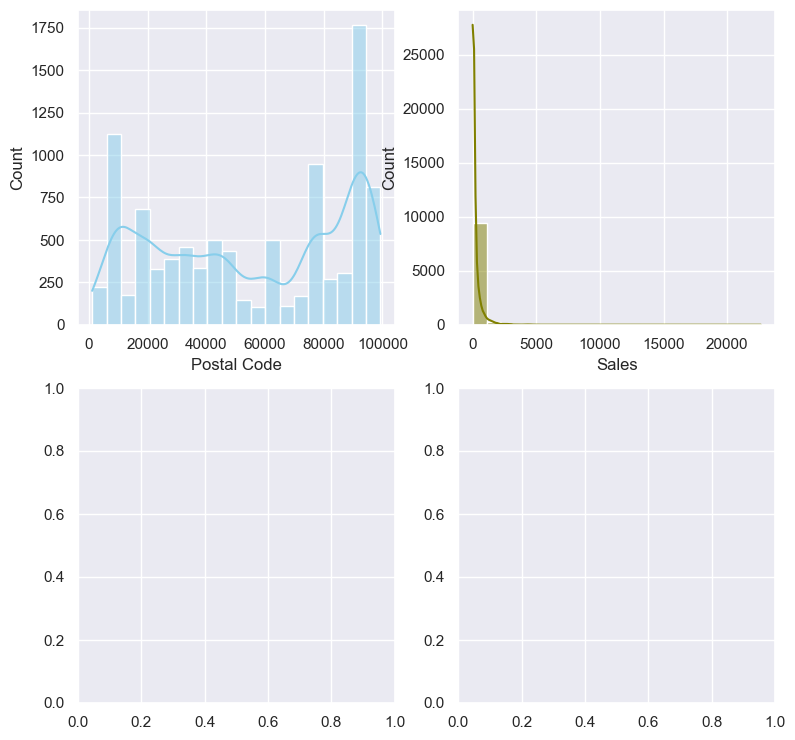

In [21]:
# Extreme values checks
# set a grey background (use sns.set_theme() 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(9, 9))

sns.histplot(country_geo['Postal Code'], bins=20, kde = True, color="skyblue", ax=axs[0, 0])
sns.histplot(country_geo['Sales'], bins=20, kde = True, color="olive", ax=axs[0, 1])

# There are not extreme values

# Plotting a Cloropleth

In [22]:
# Create a data frame with country and postal code
data_to_plot1 = country_geo[['Country','Postal Code', 'Sales']]
data_to_plot1.head()

,Country,Postal Code,Sales
0,United States,42420.0,261.9600
1,United States,42420.0,731.9400
2,United States,90036.0,14.6200
3,United States,33311.0,957.5775
4,United States,33311.0,22.3680


In [23]:
data_to_plot1

,Country,Postal Code,Sales
0,United States,42420.0,261.9600
1,United States,42420.0,731.9400
2,United States,90036.0,14.6200
3,United States,33311.0,957.5775
4,United States,33311.0,22.3680
...,...,...,...
9795,United States,60610.0,3.7980
9796,United States,43615.0,10.3680
9797,United States,43615.0,235.1880
9798,United States,43615.0,26.3760


In [29]:
adresse = data_to_plot1
adresse['complete adresse'] = df_store['State'] + ', ' + df_store['City'] + ', ' + (df_store['Postal Code Str'])

C:\Users\TEDWI\AppData\Local\Temp\ipykernel_11260\663132994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adresse['complete adresse'] = df_store['State'] + ', ' + df_store['City'] + ', ' + (df_store['Postal Code Str'])


In [30]:
adresse=pd.DataFrame(data=adresse).rename(columns={0:'complete adresse'}).reset_index().dropna()

In [31]:
adresse=adresse.groupby('complete adresse').Sales.sum()

In [32]:
adresse=pd.DataFrame(data=adresse).reset_index()

In [33]:
adresse.head()

,complete adresse,Sales
0,"Alabama, Auburn, 36830",1766.83
1,"Alabama, Decatur, 35601",3374.82
2,"Alabama, Florence, 35630",1997.35
3,"Alabama, Hoover, 35244",525.85
4,"Alabama, Huntsville, 35810",2484.37


In [37]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [38]:
locator = Nominatim(user_agent='kevhervieux@gmail.com')

In [39]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [40]:
adresse['location'] = adresse['complete adresse'].apply(geocode)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('California, Los Angeles, 90004',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in re

RateLimiter swallowed an error after 2 retries. Called with (*('California, Los Angeles, 90004',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in recv_

RateLimiter caught an error, retrying (1/2 tries). Called with (*('California, Los Angeles, 90008',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in re

RateLimiter caught an error, retrying (0/2 tries). Called with (*('California, Los Angeles, 90032',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in re

RateLimiter swallowed an error after 2 retries. Called with (*('California, Los Angeles, 90032',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in recv_

RateLimiter caught an error, retrying (1/2 tries). Called with (*('California, San Francisco, 94122',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('California, Santa Barbara, 93101',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in 

RateLimiter swallowed an error after 2 retries. Called with (*('California, Santa Barbara, 93101',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in rec

RateLimiter caught an error, retrying (1/2 tries). Called with (*('California, Santa Clara, 95051',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in re

RateLimiter caught an error, retrying (0/2 tries). Called with (*('New Jersey, Linden, 7036',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in recv_int

RateLimiter caught an error, retrying (1/2 tries). Called with (*('North Carolina, Burlington, 27217',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in

RateLimiter caught an error, retrying (0/2 tries). Called with (*('South Carolina, Mount Pleasant, 29464',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Texas, Houston, 77041',), **{}).
Traceback (most recent call last):
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\TEDWI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\TEDWI\anaconda3\lib\http\client.py", line 279, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\TEDWI\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\TEDWI\anaconda3\lib\ssl.py", line 1274, in recv_into
 

In [41]:
adresse['point'] = adresse['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [42]:
pd.DataFrame(adresse['point'].tolist(), index=adresse.index)

,0,1,2
0,32.601774,-85.476739,0.0
1,NaN,NaN,NaN
2,34.818357,-87.662680,0.0
3,33.357154,-86.819593,0.0
4,34.777611,-86.608236,0.0
...,...,...,...
622,46.694419,-92.091860,0.0
623,43.014064,-88.211037,0.0
624,44.959156,-89.662743,0.0
625,43.019245,-88.014122,0.0


In [43]:
adresse[['latitude', 'longitude', 'altitude']] = pd.DataFrame(adresse['point'].tolist(), index=adresse.index)

In [44]:
adresse

,complete adresse,Sales,location,point,latitude,longitude,altitude
0,"Alabama, Auburn, 36830",1766.830,"(Auburn, Lee County, Alabama, 36830, United St...","(32.60177444934767, -85.47673858200962, 0.0)",32.601774,-85.476739,0.0
1,"Alabama, Decatur, 35601",3374.820,None,None,NaN,NaN,NaN
2,"Alabama, Florence, 35630",1997.350,"(Florence, Lauderdale County, Alabama, 35630, ...","(34.818356978493846, -87.66267996140478, 0.0)",34.818357,-87.662680,0.0
3,"Alabama, Hoover, 35244",525.850,"(Hoover, Jefferson County, Alabama, 35244, Uni...","(33.3571538907563, -86.81959298907563, 0.0)",33.357154,-86.819593,0.0
4,"Alabama, Huntsville, 35810",2484.370,"(Huntsville, Madison County, Alabama, 35810, U...","(34.77761053298817, -86.6082355745562, 0.0)",34.777611,-86.608236,0.0
...,...,...,...,...,...,...,...
622,"Wisconsin, Superior, 54880",1299.730,"(City of Superior, Douglas County, Wisconsin, ...","(46.69441862439783, -92.09185955376846, 0.0)",46.694419,-92.091860,0.0
623,"Wisconsin, Waukesha, 53186",54.500,"(Waukesha, Waukesha County, Wisconsin, 53186, ...","(43.01406434624506, -88.21103738432147, 0.0)",43.014064,-88.211037,0.0
624,"Wisconsin, Wausau, 54401",317.480,"(Wisconsin Court of Appeals, District III, 210...","(44.9591556, -89.6627428, 0.0)",44.959156,-89.662743,0.0
625,"Wisconsin, West Allis, 53214",250.480,"(West Allis, Milwaukee County, Wisconsin, 5321...","(43.01924527025214, -88.01412236363343, 0.0)",43.019245,-88.014122,0.0


In [45]:
adresse_backup=adresse

In [46]:
adresse=adresse_backup
adresse=adresse[adresse['longitude'].notnull()]
adresse=adresse[adresse['latitude'].notnull()]
adresse=adresse.reset_index()
adresse

,index,complete adresse,Sales,location,point,latitude,longitude,altitude
0,0,"Alabama, Auburn, 36830",1766.830,"(Auburn, Lee County, Alabama, 36830, United St...","(32.60177444934767, -85.47673858200962, 0.0)",32.601774,-85.476739,0.0
1,2,"Alabama, Florence, 35630",1997.350,"(Florence, Lauderdale County, Alabama, 35630, ...","(34.818356978493846, -87.66267996140478, 0.0)",34.818357,-87.662680,0.0
2,3,"Alabama, Hoover, 35244",525.850,"(Hoover, Jefferson County, Alabama, 35244, Uni...","(33.3571538907563, -86.81959298907563, 0.0)",33.357154,-86.819593,0.0
3,4,"Alabama, Huntsville, 35810",2484.370,"(Huntsville, Madison County, Alabama, 35810, U...","(34.77761053298817, -86.6082355745562, 0.0)",34.777611,-86.608236,0.0
4,5,"Alabama, Mobile, 36608",5462.990,"(Mobile, Mobile County, Alabama, 36608, United...","(30.693637289780217, -88.1883950078022, 0.0)",30.693637,-88.188395,0.0
...,...,...,...,...,...,...,...,...
612,622,"Wisconsin, Superior, 54880",1299.730,"(City of Superior, Douglas County, Wisconsin, ...","(46.69441862439783, -92.09185955376846, 0.0)",46.694419,-92.091860,0.0
613,623,"Wisconsin, Waukesha, 53186",54.500,"(Waukesha, Waukesha County, Wisconsin, 53186, ...","(43.01406434624506, -88.21103738432147, 0.0)",43.014064,-88.211037,0.0
614,624,"Wisconsin, Wausau, 54401",317.480,"(Wisconsin Court of Appeals, District III, 210...","(44.9591556, -89.6627428, 0.0)",44.959156,-89.662743,0.0
615,625,"Wisconsin, West Allis, 53214",250.480,"(West Allis, Milwaukee County, Wisconsin, 5321...","(43.01924527025214, -88.01412236363343, 0.0)",43.019245,-88.014122,0.0


In [47]:
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [48]:
us_map=folium.Map(location=[37.0902, -95.7129], zoom_start=4,tiles='cartodbpositron')
mc=MarkerCluster()
client=folium.map.FeatureGroup()
for lat, lng, in zip(adresse['latitude'], adresse['longitude']):
    client.add_child(
        folium.features.Marker([lat, lng]))
us_map.add_child(client)
us_map

In [49]:
us_heat_map=folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles='cartodbpositron')
HeatMap(data=adresse[['latitude','longitude']],radius=15).add_to(us_heat_map)#Tentatives avec 5-10-15-20-25 et 15 donne le meilleur résultat.
us_heat_map

In [52]:
lazipcodes = []
for i in range(len(data['features'])):
    zip_code = data['features'][i]['properties']['name']
    lazipcodes.append(zip_code)

shelters = pd.DataFrame({'ZIP':country_geo['Postal Code'], 'COUNT': country_geo['Sales']})

KeyError: 'name'

In [53]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[34.0522, -118.2437], zoom_start=8)


# Now lets use the JSON file as base for the geographic locations and combine with the DF with the information we want. 
folium.Choropleth(
    geo_data = geo, 
    data = data_to_plot1,
    columns = ['Postal Code', 'Sales'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,  #'YlGn'#https://github.com/python-visualization/folium/blob/v0.2.0/folium/utilities.py#L104
    legend_name = "Postal Code").add_to(map)
folium.LayerControl().add_to(map)


FileNotFoundError: [Errno 2] No such file or directory: 'C:Users\\TEDWI\\OneDrive\\Project 6\\countries.geojson'

In [ ]:
country_geo

In [ ]:
# Create a data frame with country and Sales
data_to_plot2 = country_geo[['Country','Sales']]
data_to_plot2.head()

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start=1.5)


# Now lets use the JSON file as base for the geographic locations and combine with the DF with the information we want. 
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot1,
    columns = ['Country','Sales'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,  #'YlGn'#https://github.com/python-visualization/folium/blob/v0.2.0/folium/utilities.py#L104
    legend_name = "Sales").add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
# Create a data frame with state and postal code
data_to_plot3 = country_geo[['State','Postal Code']]
data_to_plot3.head()

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start=1.5)


# Now lets use the JSON file as base for the geographic locations and combine with the DF with the information we want. 
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot1,
    columns = ['State','Postal Code'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,  #'YlGn'#https://github.com/python-visualization/folium/blob/v0.2.0/folium/utilities.py#L104
    legend_name = "Postal Code").add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
# Create a data frame with state and sales
data_to_plot4 = country_mainVariab[['State','Sales']]
data_to_plot4.head()

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start=1.5)


# Now lets use the JSON file as base for the geographic locations and combine with the DF with the information we want. 
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot1,
    columns = ['State','Sales'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,  #'YlGn'#https://github.com/python-visualization/folium/blob/v0.2.0/folium/utilities.py#L104
    legend_name = "Sales").add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
# Create a data frame with country and Sales
data_to_plot4 = country_mainVariab[['Category','Sales']]
data_to_plot4.head()

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[100, 0], zoom_start=1.5)


# Now lets use the JSON file as base for the geographic locations and combine with the DF with the information we want. 
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot1,
    columns = ['Category','Sales'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,  #'YlGn'#https://github.com/python-visualization/folium/blob/v0.2.0/folium/utilities.py#L104
    legend_name = "Sales").add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
map.save('plot_data.html')

# Results
- Questions Answered

### This Choropleth map gives a clear look at how the postal codes and sales are disbersed in the contients. It answers the question of how frequently Super Store products are purchased in specific States and countires and shows that postal code has an impact on the number of sales. It gives an idea of where Super Store should delegate most of its resources to continue serving its clients as well as where super store can launch new products to maximize return orevenue.